In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [3]:
def plot_data_from_file(
    filepath: str, 
    column_name: str, 
    station_id: int, 
    start_date=None, 
    end_date=None, 
    second_column_name=None
):
    """
    Imports HYPE subbasin output and plots one or two of the variables. This function can also take specific 
    dates to plot.

    Arguments:
    - filepath (str): The path to the HYPE output text file.
    - column_name (str): The name of the first column to plot against the row index.
    - station_id (int): The ID of the station being looked at. This is used in the title of the plot.
    - start_date (str, optional): The start date in YYYY-MM-DD format. Defaults to None.
    - end_date (str, optional): The end date in YYYY-MM-DD format. Defaults to None.
    - second_column_name (str, optional): The name of the second column to plot on the mirrored y-axis. Defaults to None.

    Returns:
    None
    """

    # Read the text file into a DataFrame with tab-separated values, skipping the first row,
    # and specifying the data types of the columns
    dtype = {0: 'str'}  # Specify the data type of the first column as string
    df = pd.read_csv(filepath, sep='\t', index_col=0, dtype=dtype)
    
    # Find the column index based on the input string
    column_index = df.columns.get_loc(column_name)
    
    # Extract the units from the first row
    units = df.iloc[0, column_index]
    
    if second_column_name is not None:
        # Find the column index for the second variable
        second_column_index = df.columns.get_loc(second_column_name)
        second_units = df.iloc[0, second_column_index]
    
    # Delete the first row from the DataFrame
    df = df.iloc[1:]

    # Replace values of -9999 with NaN
    df = df.replace(-9999, np.nan)

    # Convert the index column values to datetime
    df.index = pd.to_datetime(df.index, errors='coerce')

    # Convert all the data to float, replacing non-numeric values with NaN
    df = df.apply(pd.to_numeric, errors='coerce')

    # Filter the DataFrame based on the start and end dates, if provided
    if start_date is not None and end_date is not None:
        df = df.loc[start_date:end_date]

    # Set the figure size
    plt.figure(figsize=(12, 6))  # Adjust the width and height as desired

    # Slant the x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    # Plot the first variable on the primary y-axis
    line1, = plt.plot(df.index, df.iloc[:, column_index], label=column_name)
    plt.xlabel(df.index.name)
    plt.ylabel(f"{column_name} ({units})")
    plt.title(f"Plot for Station ID {station_id}")
    
    # Plot the second variable on the mirrored y-axis
    if second_column_name is not None:
        ax = plt.gca().twinx()
        line2, = ax.plot(df.index, df.iloc[:, second_column_index], color='red', label=second_column_name)
        ax.set_ylabel(f"{second_column_name} ({second_units})")
    
    # Combine the legend handles and labels for both variables
    if second_column_name is not None:
        handles = [line1, line2]
        labels = [line1.get_label(), line2.get_label()]
    else:
        handles, labels = plt.gca().get_legend_handles_labels()

    # Add legend
    plt.legend(handles, labels)

    # Add labels on the x-axis
    if start_date is None and end_date is None:
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=6))

    if start_date is not None and end_date is not None:
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)
        delta_years = (end - start).days / 365.25  # Account for leap years
        if delta_years <= 2:
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        elif 2 < delta_years <= 6:
            plt.gca().xaxis.set_major_locator(mdates.YearLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
        elif delta_years > 6:
            plt.gca().xaxis.set_major_locator(mdates.YearLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

    # Display the plot
    plt.show()

/tmp/ipykernel_24466/3398802649.py:28: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep='\t', index_col=0, dtype=dtype)


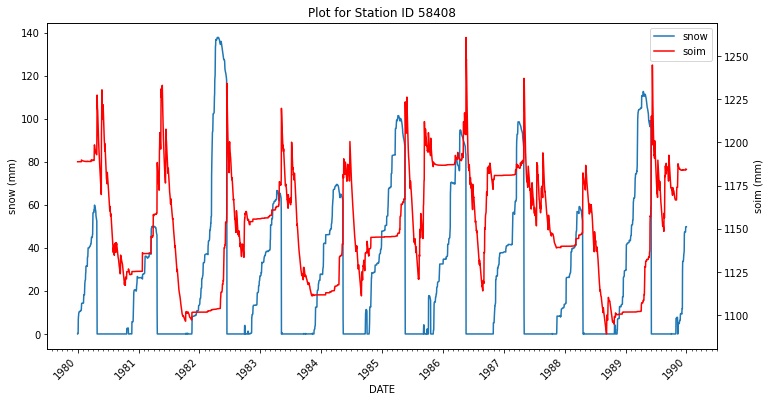

In [4]:
plot_data_from_file('/home/paulc600/local/HYPE/08_outputs/0058408.txt', 'snow', 58408, '1980-01-01', '1990-01-01','soim')